In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import os
import warnings
warnings.filterwarnings('ignore')
print(os.listdir("E:/Research/"))

['A11740681S419.pdf', 'Anaconda3-2019.10-Windows-x86_64.exe', 'B11630782S319.pdf', 'heart.csv', 'HeartDiseaseFinal.html', 'HeartDiseaseFinal.pdf', 'MID', 'Prediction_of_Heart_Disease_Using_Machine_Learning.pdf', 'Research.txt']


In [2]:
data = pd.read_csv('E:/Research/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print('Data Last 7 Rows Show\n')
data.tail(7)

Data Last 7 Rows Show



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
print('Data Show Describe\n')
data.describe()


Data Show Describe



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
print('Data Show Info\n')
data.info()

Data Show Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
data.sample(frac=0.01)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1


In [8]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [9]:
data=data.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':'Restecg','thalach':'Thalach','exang':'Exang','oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','target':'Target'})

In [10]:
data.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [11]:
print('Data Shape Show\n')
data.shape

Data Shape Show



(303, 14)

In [12]:
data.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Target      0
dtype: int64

In [13]:
data.isnull().values.any()

False

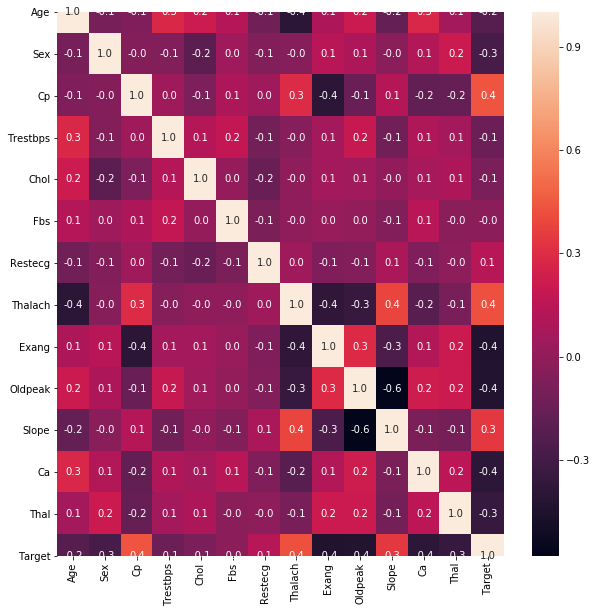

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [16]:
data.Age.value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: Age, dtype: int64

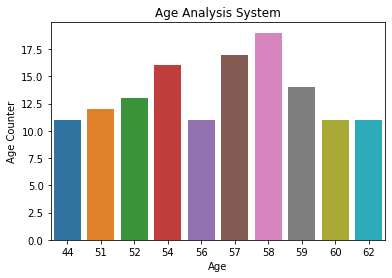

In [17]:
sns.barplot(x=data.Age.value_counts()[:10].index,y=data.Age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

In [18]:
minAge=min(data.Age)
maxAge=max(data.Age)
meanAge=data.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [19]:
young_ages=data[(data.Age>=29)&(data.Age<40)]
middle_ages=data[(data.Age>=40)&(data.Age<55)]
elderly_ages=data[(data.Age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


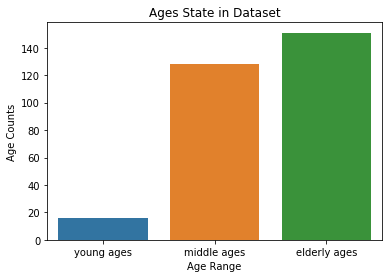

In [20]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

In [21]:
data['AgeRange']=0
youngAge_index=data[(data.Age>=29)&(data.Age<40)].index
middleAge_index=data[(data.Age>=40)&(data.Age<55)].index
elderlyAge_index=data[(data.Age>55)].index

In [22]:
for index in elderlyAge_index:
    data.loc[index,'AgeRange']=2
    
for index in middleAge_index:
    data.loc[index,'AgeRange']=1

for index in youngAge_index:
    data.loc[index,'AgeRange']=0

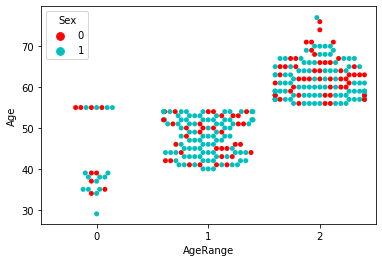

In [23]:
sns.swarmplot(x="AgeRange", y="Age",hue='Sex',
              palette=["r", "c", "y"], data=data)
plt.show()

In [24]:
data.Sex.value_counts()

1    207
0     96
Name: Sex, dtype: int64

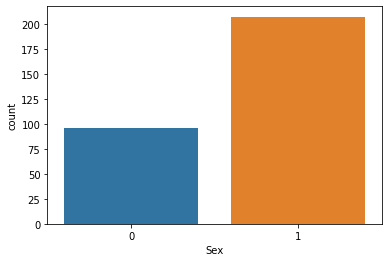

In [25]:
sns.countplot(data.Sex)
plt.show()

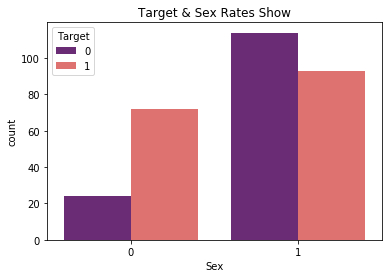

In [26]:
sns.countplot(data.Sex, hue=data.Target, dodge= True, palette ="magma")
plt.title('Target & Sex Rates Show')
plt.show()

In [27]:
data.Cp.value_counts()

0    143
2     87
1     50
3     23
Name: Cp, dtype: int64

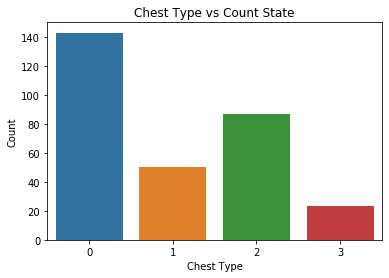

In [28]:
sns.countplot(data.Cp)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()

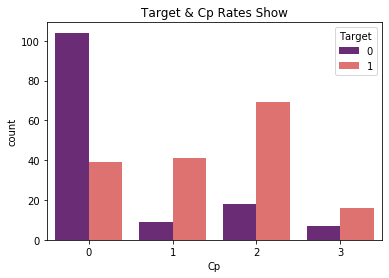

In [29]:
sns.countplot(data.Cp, hue=data.Target, dodge= True, palette ="magma")
plt.title('Target & Cp Rates Show')
plt.show()

In [30]:
data.Ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: Ca, dtype: int64

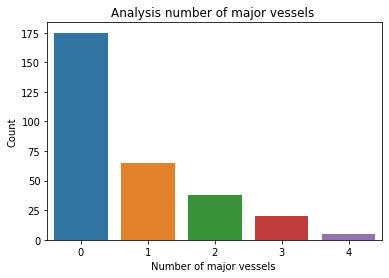

In [31]:
sns.countplot(data.Ca)
plt.xlabel('Number of major vessels ')
plt.ylabel('Count')
plt.title('Analysis number of major vessels ')
plt.show()

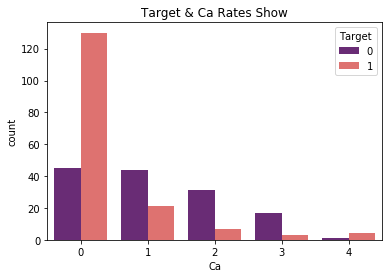

In [32]:
sns.countplot(data.Ca, hue=data.Target, dodge= True, palette ="magma")
plt.title('Target & Ca Rates Show')
plt.show()

In [33]:
data.Trestbps.value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: Trestbps, dtype: int64

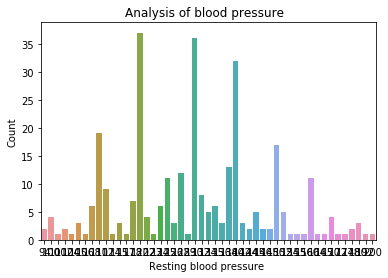

In [34]:
sns.countplot(data.Trestbps)
plt.xlabel('Resting blood pressure ')
plt.ylabel('Count')
plt.title('Analysis of blood pressure  ')
plt.show()

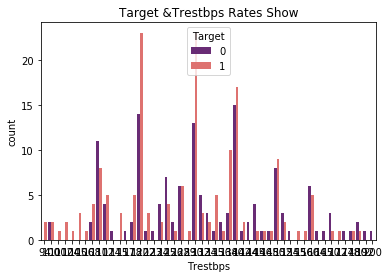

In [35]:
sns.countplot(data.Trestbps, hue=data.Target, dodge= True, palette ="magma")
plt.title('Target &Trestbps Rates Show')
plt.show()

In [36]:
data.Oldpeak.value_counts()

0.0    99
1.2    17
0.6    14
1.0    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
1.5     5
0.5     5
3.0     5
2.2     4
3.6     4
2.4     3
3.4     3
4.0     3
0.9     3
0.3     3
2.3     2
4.2     2
1.1     2
2.5     2
3.2     2
6.2     1
2.1     1
4.4     1
1.3     1
3.1     1
0.7     1
5.6     1
3.8     1
2.9     1
3.5     1
Name: Oldpeak, dtype: int64

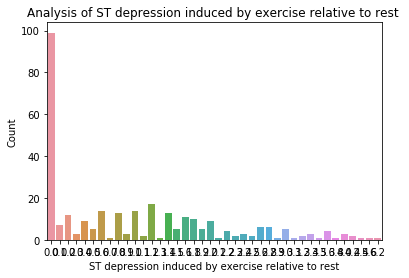

In [37]:
sns.countplot(data.Oldpeak)
plt.xlabel('ST depression induced by exercise relative to rest')
plt.ylabel('Count')
plt.title('Analysis of ST depression induced by exercise relative to rest ')
plt.show()

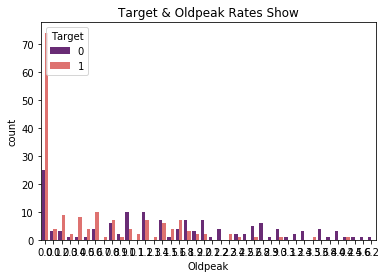

In [38]:
sns.countplot(data.Oldpeak, hue=data.Target, dodge= True, palette ="magma")
plt.title('Target & Oldpeak Rates Show')
plt.show()

In [39]:
data.Slope.value_counts()

2    142
1    140
0     21
Name: Slope, dtype: int64

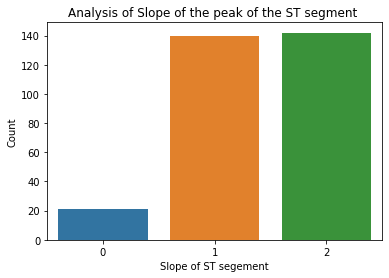

In [40]:
sns.countplot(data.Slope)
plt.xlabel('Slope of ST segement')
plt.ylabel('Count')
plt.title('Analysis of Slope of the peak of the ST segment ')
plt.show()

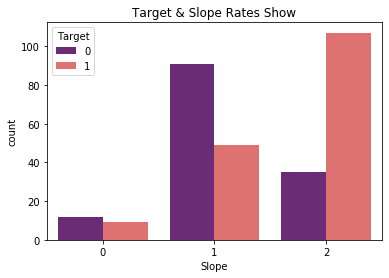

In [41]:
sns.countplot(data.Slope, hue=data.Target, dodge= True, palette ="magma")
plt.title('Target & Slope Rates Show')
plt.show()

In [42]:
data.Thalach.value_counts()[:20]

162    11
160     9
163     9
173     8
152     8
125     7
132     7
150     7
172     7
143     7
144     7
156     6
169     6
158     6
140     6
142     6
178     5
161     5
154     5
165     5
Name: Thalach, dtype: int64

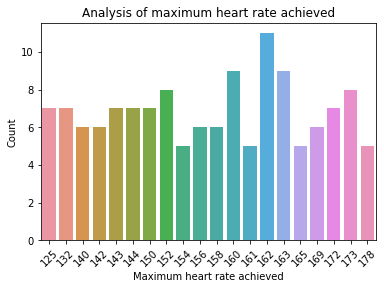

In [43]:
sns.barplot(x=data.Thalach.value_counts()[:20].index,y=data.Thalach.value_counts()[:20].values)
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Count')
plt.title('Analysis of maximum heart rate achieved')
plt.xticks(rotation=45)
plt.show()

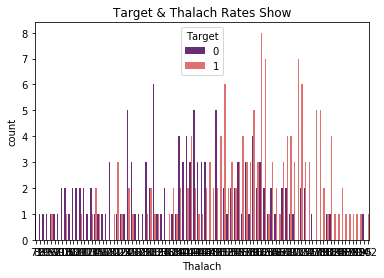

In [44]:
sns.countplot(data.Thalach, hue=data.Target, dodge= True, palette ="magma")
plt.title('Target & Thalach Rates Show')
plt.show()

In [45]:
data.Thal.value_counts()


2    166
3    117
1     18
0      2
Name: Thal, dtype: int64

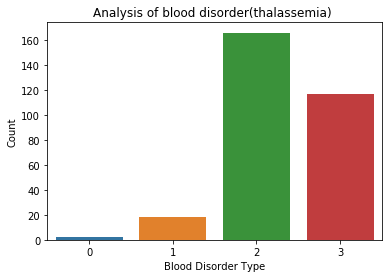

In [46]:
sns.countplot(data.Thal)
plt.xlabel('Blood Disorder Type')
plt.ylabel('Count')
plt.title('Analysis of blood disorder(thalassemia) ')
plt.show()

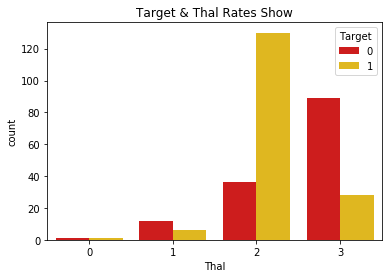

In [47]:
sns.countplot(data.Thal, hue=data.Target, dodge= True, palette ="hot")
plt.title('Target & Thal Rates Show')
plt.show()

In [48]:
data.Target.unique()

array([1, 0], dtype=int64)

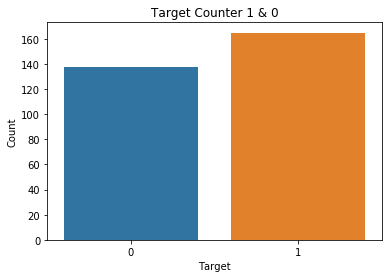

In [49]:
sns.countplot(data.Target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Counter 1 & 0')
plt.show()

In [50]:
dataX=data.drop('Target',axis=1)
dataY=data['Target']

In [51]:
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=42)

In [52]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (242, 14)
X_test (61, 14)
y_train (242,)
y_test (61,)


In [53]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [54]:
from sklearn.decomposition import PCA
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(X_train.columns.values.tolist())
print()
print(pca.components_)

[0.25069557 0.17935193 0.12879318 0.09556117 0.07603197 0.06460611
 0.05580481 0.04257635 0.02999253 0.02360139 0.02075818 0.0156925
 0.01026596 0.00626834]

['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AgeRange']

[[ 8.81347322e-02  4.65342239e-01 -3.12452745e-01  1.31979053e-02
  -2.64386397e-03  1.94504864e-02 -3.71456984e-02 -1.75249277e-01
   7.17707790e-01  1.68676245e-01 -2.23545648e-01  1.20887016e-01
   1.28737326e-01  1.43856767e-01]
 [ 1.62605861e-01 -8.54520916e-01 -2.04167585e-01  6.49323130e-02
   6.97159523e-02 -2.53324239e-02 -7.27306422e-03 -1.29131596e-01
   3.18807628e-01  4.99567080e-02 -1.41977238e-01 -5.38494882e-03
  -3.12811740e-02  2.23436334e-01]
 [ 3.23243751e-01  1.05671125e-01  2.09016455e-01  1.17663387e-01
   3.88361436e-02  5.11356159e-01 -2.02594772e-01 -7.34055729e-02
  -2.67149471e-01  5.70813735e-02 -1.18879224e-01  2.18032882e-01
  -2.85637322e-02  6.16664038e-01]
 [-1.65405805e-01

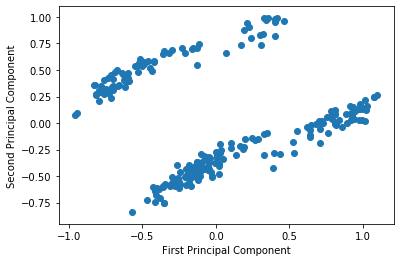

In [55]:
pca = PCA(n_components=8)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

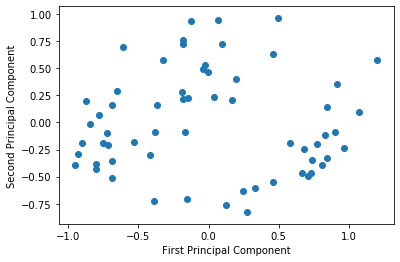

In [56]:
pca = PCA(n_components=8)
pca.fit(X_test)
reduced_data_test = pca.transform(X_test)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [57]:
reduced_data_train = pd.DataFrame(reduced_data_train, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
reduced_data_test = pd.DataFrame(reduced_data_test, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
X_train=reduced_data_train
X_test=reduced_data_test

In [58]:
combine_features_list=[
    ('Dim1','Dim2','Dim3'),
    ('Dim4','Dim5','Dim5','Dim6'),
    ('Dim7','Dim8','Dim1'),
    ('Dim4','Dim8','Dim5')
]

In [59]:
parameters=[
{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6]
    },
]
print("*"*50)
for features in combine_features_list:
    print(features)
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
    
    gsknn=GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
    gsknn.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gsknn.best_params_)
    print("*"*50)
    predictions = [
    (gsknn.predict(X_train_set), y_train, 'Train'),
    (gsknn.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] +' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        print("*"*50)    
    basari=cross_val_score(estimator=KNeighborsClassifier(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
('Dim1', 'Dim2', 'Dim3')
**************************************************
Best parameters set:
{'n_jobs': 2, 'n_neighbors': 12}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       109
           1       0.83      0.76      0.79       133

    accuracy                           0.78       242
   macro avg       0.78      0.78      0.78       242
weighted avg       0.79      0.78      0.78       242

**************************************************
Train Confusion Matrix:
[[ 88  21]
 [ 32 101]]
**************************************************
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.78   

Accurancy Oranı : 0.8032786885245902
KNN TRAIN score with  0.7851239669421488
KNN TEST score with  0.8032786885245902

[[21  8]
 [ 4 28]]


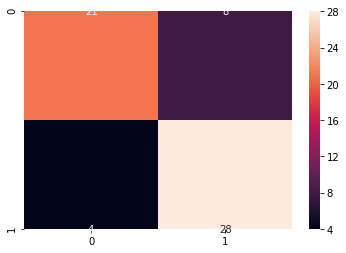

In [61]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=22)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

y_proba=knn.predict_proba(X_test)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("KNN TRAIN score with ",format(knn.score(X_train, y_train)))
print("KNN TEST score with ",format(knn.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()